In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ashfakyeafi/cat-dog-images-for-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification
License(s): CC0-1.0
100% 543M/545M [00:25<00:00, 24.4MB/s]
100% 545M/545M [00:25<00:00, 22.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-dog-images-for-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from matplotlib import image as mping
from sklearn.preprocessing import LabelEncoder
import keras
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [ ]:
df = pd.read_csv("/content/cat_dog.csv")
df.head()

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   25000 non-null  object
 1   labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
label = df.sort_values(by = 'image')
label

,image,labels
9081,cat.0.jpg,0
5265,cat.1.jpg,0
18273,cat.10.jpg,0
1278,cat.100.jpg,0
1092,cat.1000.jpg,0
...,...,...
17750,dog.9995.jpg,1
15374,dog.9996.jpg,1
5459,dog.9997.jpg,1
1516,dog.9998.jpg,1


(471, 499, 3)


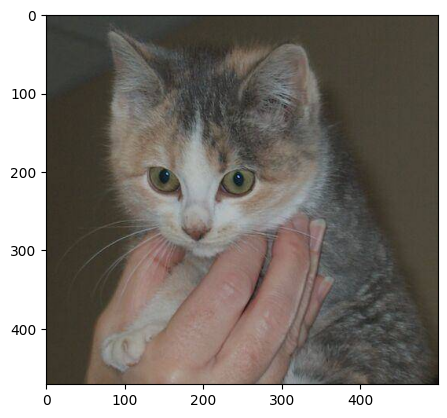

In [ ]:
img=np.array(mping.imread("/content/cat_dog/cat.10002.jpg"))
img.setflags(write=1)
print(img.shape)
plt.imshow(img)
plt.show()

(150, 96, 3)


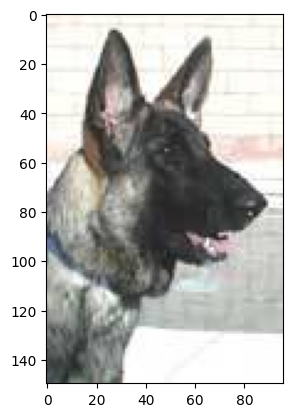

In [ ]:
img=np.array(mping.imread("/content/cat_dog/dog.9999.jpg"))
img.setflags(write=1)
print(img.shape)
plt.imshow(img)
plt.show()

In [ ]:
df['labels'].value_counts()

,count
labels,
1,12500
0,12500


<Axes: xlabel='labels'>

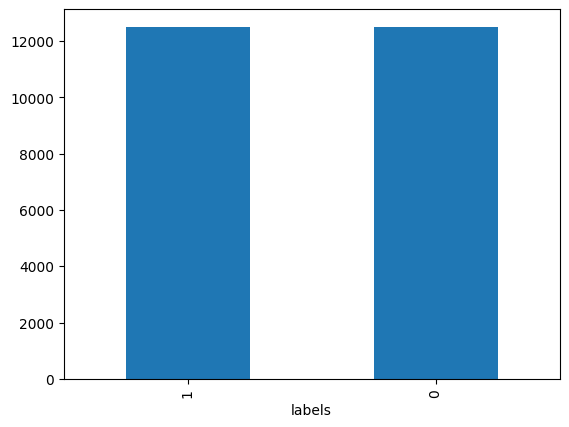

In [ ]:
df['labels'].value_counts().plot.bar()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [ ]:

import os
import shutil

# Create directories for cats and dogs
os.makedirs('cat_dog/cats', exist_ok=True)
os.makedirs('cat_dog/dogs', exist_ok=True)

# Move images based on labels
for index, row in df.iterrows():
    src = os.path.join('cat_dog', row['image'])

    if row['labels'] == 0:
        dest = os.path.join('cat_dog/cats', row['image'])
    else:
        dest = os.path.join('cat_dog/dogs', row['image'])

    if os.path.exists(src):  # Ensure the source file exists
        shutil.move(src, dest)

print("Images organized successfully!")


Images organized successfully!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

# Split dataset for training and validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_df = datagen.flow_from_directory(
    'cat_dog',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


validation_df = datagen.flow_from_directory(
    'cat_dog',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers


model = Sequential()


model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same',
                 kernel_regularizer=regularizers.l2(0.01), input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


# Fully Connected Layers
model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))



In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 9, 9, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,2

 Total params: 369,969 (1.41 MB)

 Trainable params: 369,473 (1.41 MB)

 Non-trainable params: 496 (1.94 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

# Add ModelCheckpoint to save the best weights, ensuring the filepath ends with '.keras'
checkpoint = ModelCheckpoint('best_weights.keras', save_best_only=True, monitor='val_accuracy', mode='max')


history = model.fit(
    train_df,
    epochs=25,
    validation_data=validation_df,
    callbacks=[checkpoint]
)


model.load_weights('best_weights.keras')

# Evaluate the model
loss, accuracy = model.evaluate(validation_df)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 70ms/step - accuracy: 0.6318 - loss: 1.9078 - val_accuracy: 0.5180 - val_loss: 1.1542
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7463 - loss: 0.8015 - val_accuracy: 0.6294 - val_loss: 0.8625
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.7946 - loss: 0.6249 - val_accuracy: 0.6350 - val_loss: 0.8520
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.8465 - loss: 0.5680 - val_accuracy: 0.7912 - val_loss: 0.6222
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8799 - loss: 0.5125 - val_accuracy: 0.8214 - val_loss: 0.5926
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8748 - loss: 0.4994 - val_accuracy: 0.8528 - val_loss: 0.5495
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.8921 - loss: 0.4750 - val_accuracy: 0.8262 - val_loss: 0.5827
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8958 - loss: 0.4621 - 

In [ ]:
test_loss, test_acc = model.evaluate(validation_df)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8864 - loss: 0.4334
Test Accuracy: 88.88%
Test Loss: 0.4318


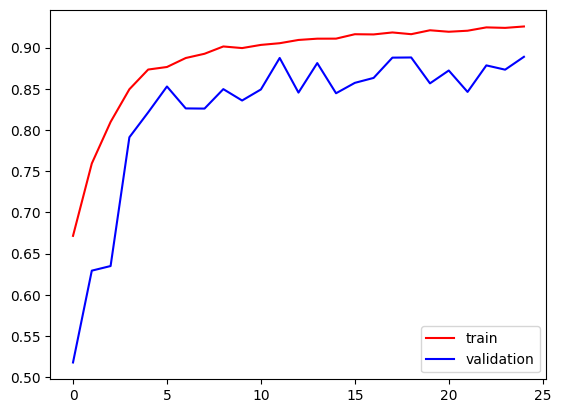

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color ='red',label ='train')
plt.plot(history.history['val_accuracy'],color ='blue',label ='validation')
plt.legend()
plt.show()

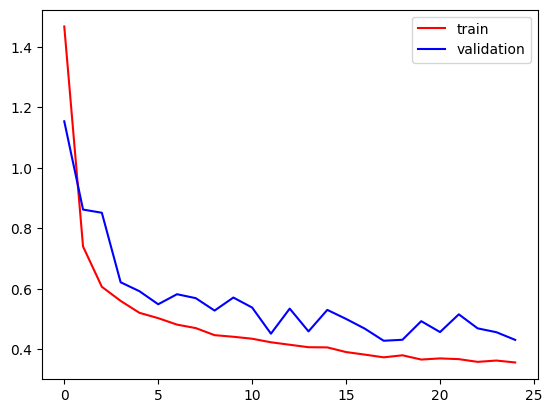

In [ ]:


plt.plot(history.history['loss'],color ='red',label ='train')
plt.plot(history.history['val_loss'],color ='blue',label ='validation')
plt.legend()
plt.show()

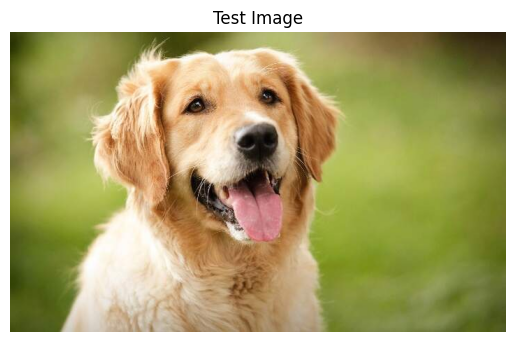

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step
Prediction (0: Cat, 1: Dog): Dog


In [ ]:
# Step 8: Test Prediction
import cv2
import numpy as np
import matplotlib.pyplot as plt
test_img = cv2.imread('/content/golden-retriever-tongue-out.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.title('Test Image')
plt.axis('off')
plt.show()

test_img = cv2.resize(test_img, (150, 150)) / 255.0
test_input = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_input)

print("Prediction (0: Cat, 1: Dog):", "Dog" if prediction[0][0] > 0.5 else "Cat")

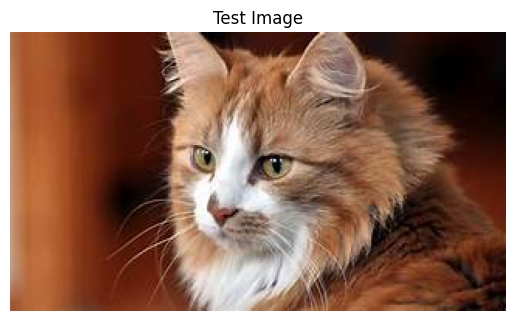

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction (0: Cat, 1: Dog): Cat


In [ ]:
test_img = cv2.imread('/content/th.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.title('Test Image')
plt.axis('off')
plt.show()

test_img = cv2.resize(test_img, (150, 150)) / 255.0
test_input = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_input)

print("Prediction (0: Cat, 1: Dog):", "Dog" if prediction[0][0] > 0.5 else "Cat")